# Laboratorio 2: Limpieza de datos
**Nombre**: Miguel Castillo

In [113]:
"""Importar Librerias """

"""crear dataframes"""
import pandas as pd
"""crear vectores, matrices y calculos estadisticos"""
import numpy as np
""" modulo para aplicar metodos a los datos de tipo texto"""
import string
""" crear tecnicas de imputacion de datos con estrategias"""
from sklearn.impute import SimpleImputer
""" crear graficas personalizadas """
import seaborn as sns
""" crear graficas con datos """
import matplotlib.pyplot as plt
""" visualizar datos faltantes """
import missingno as msno

## 1. Analizar el dataset

In [4]:
""" importar el dataset """
df = pd.read_csv('data_act_01.csv',sep=';')

""" visualizar diez primeros registros """
df.head(10)

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
0,160903280,Assault / Battery,2016-03-30T00:00:00,18:42,2016-03-30T18:42:00,REP,100 Block Of Chilton Av,San Francisco,CA,1,NaN,Premise Address
1,160912272,Homeless Complaint,2016-03-31T00:00:00,15:31,2016-03-31T15:31:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
2,160912590,Susp Info,2016-03-31T00:00:00,16:49,2016-03-31T16:49:00,GOA,2300 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
3,160912801,Report,2016-03-31T00:00:00,17:38,2016-03-31T17:38:00,GOA,500 Block Of 7th St,San Francisco,CA,1,NaN,Premise Address
4,160912811,594,2016-03-31T00:00:00,17:42,2016-03-31T17:42:00,REP,Beale St/bryant St,San Francisco,CA,1,NaN,Intersection
5,160913003,Ref'd,2016-03-31T00:00:00,18:29,2016-03-31T18:29:00,GOA,16th St/pond St,San Francisco,CA,1,NaN,Intersection
6,160913050,Homeless Complaint,2016-03-31T00:00:00,18:43,2016-03-31T18:43:00,ADV,Berwick Pl/harrison St,San Francisco,CA,1,NaN,Intersection
7,160913056,Homeless Complaint,2016-03-31T00:00:00,18:47,2016-03-31T18:47:00,HAN,Florida St/mariposa St,San Francisco,CA,1,NaN,Intersection
8,160913078,Agg Assault / Adw Dv,2016-03-31T00:00:00,18:52,2016-03-31T18:52:00,ND,100 Block Of Genebern Wy,San Francisco,CA,1,NaN,Premise Address
9,160913103,Encampment,2016-03-31T00:00:00,18:57,2016-03-31T18:57:00,ADV,2700 Block Of Folsom St,San Francisco,CA,1,NaN,Premise Address


In [3]:
""" obtener informacion de variables del dataset """
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10051 entries, 0 to 10050
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CrimeId                10051 non-null  int64  
 1   OriginalCrimeTypeName  10051 non-null  object 
 2   OffenseDate            10051 non-null  object 
 3   CallTime               10051 non-null  object 
 4   CallDateTime           10051 non-null  object 
 5   Disposition            10051 non-null  object 
 6   Address                10051 non-null  object 
 7   City                   9730 non-null   object 
 8   State                  10048 non-null  object 
 9   AgencyId               10051 non-null  object 
 10  Range                  0 non-null      float64
 11  AddressType            10051 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 942.4+ KB


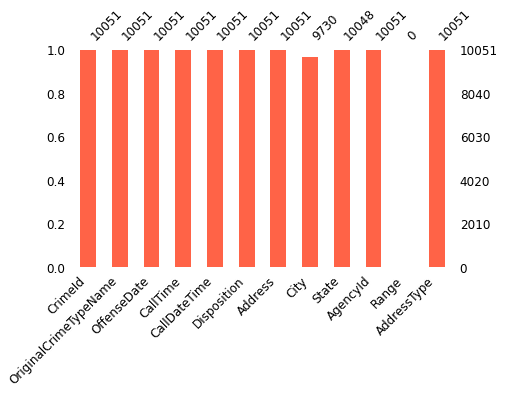

In [47]:
""" crear instancia de propiedades de figura"""
fig = plt.figure(figsize=(15,4))
""" añadir ejes verticales y horizontales """
ax1 = fig.add_subplot(1,2,1)
""" obtener datos faltantes por columna """
msno.bar(df, fontsize=12, color='tomato', ax=ax1)
""" almacenar imagen con formato """
plt.savefig('Muestra_datosFaltantes.jpg', dpi=300, bbox_inches='tight')
"""mostrar imagen"""
plt.show()

**Interpretación del dataset**: <br>
El dataset cuenta con 12 caracteristicas y 10051 muestras recopiladas. La mayoría de las columnas poseen el tipo de dato objeto. Sin embargo, la característica 'CrimeId' y 'Range' son de tipo de dato numerico. Algunas columnas poseen datos faltantes, especialmente la caracteristica 'Range' que no contiene ni un valor en sus filas como se puede observar en la gráfica. Así mismo, se encuentra la característica City y State donde su nivel de datos faltantes no es tan exgerado a comparación de la columna 'Range'.

In [96]:
""" listar caracteristicas del dataset """
caracteristicas = ['CrimeId','OriginalCrimeTypeName','OffenseDate','CallTime','CallDateTime','Disposition','Address','City','State','AgencyId','AddressType']

# 2. Identificar errores en los datos del dataset

## 2.1 Localizar datos faltantes (Nan)

In [49]:
""" encontrar cantidad de datos faltantes en el dataset """
df.isnull().sum()

CrimeId                      0
OriginalCrimeTypeName        0
OffenseDate                  0
CallTime                     0
CallDateTime                 0
Disposition                  0
Address                      0
City                       321
State                        3
AgencyId                     0
Range                    10051
AddressType                  0
dtype: int64

In [50]:
""" encontrar el promedio de los datos faltantes """
np.round(df.isnull().mean(),4)

CrimeId                  0.0000
OriginalCrimeTypeName    0.0000
OffenseDate              0.0000
CallTime                 0.0000
CallDateTime             0.0000
Disposition              0.0000
Address                  0.0000
City                     0.0319
State                    0.0003
AgencyId                 0.0000
Range                    1.0000
AddressType              0.0000
dtype: float64

El primer resultado de esta sección muestra las columnas o características que poseen valores nulos o datos faltantes. Existen 3 características que poseen esos datos desconocidos, las cuales son City, State y Range. El resto de columnas se encuentra con datos completos. También, se ha encontrado el promedio de estos datos faltantes. La columna City cuenta con promedio 31.9%, la columna State tiene el 0.3% y Range tiene un 100% de datos faltantes. En el caso de la característica Range tiene una particularidad la cual es que todas sus filas son datos faltantes. 

#### **Errores encontrados:**
1. La columna City cuenta con un promedio de 31.9% de datos faltantes.
2. La columna State cuenta con un promedio de 0.3% de datos faltantes.
3. La columna Range tiene el 100% de datos faltantes, es decir todas sus filas no tienen un valor real hacia el cual se pueda hacer una referencia.

A continuación, se muestra una consulta de muestras que coinciden con datos faltantes en las columnas mencionadas:

In [51]:
df[(df['City'].isnull()) & (df['State'].isnull()) & (df['Range'].isnull())]

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
5771,160942112,Auto Boost / Strip,2016-04-03T00:00:00,14:30,2016-04-03T14:30:00,REP,Martin Luther King Dr/bowling Green Dr,NaN,NaN,CA,NaN,1
8473,160953118,Auto Boost / Strip,2016-04-04T00:00:00,18:11,2016-04-04T18:11:00,REP,Conservatory Drive E/john F Kennedy Dr,NaN,NaN,CA,NaN,1


## 2.2 Hallar datos duplicados

In [52]:
""" comprobar existencia de registros duplicados en todo el dataset"""
df.duplicated().sum()

0

In [53]:
""" crear funcion para obtener datos duplicados por cada columna"""
def encontrar_duplicados(n_caracteristicas):
    for i in n_caracteristicas:
        """mostrar columna y suma de valores duplicados"""
        print(i,':' ,df.duplicated(i,keep=False).sum())

In [54]:
""" obtener datos duplicados por columnas"""
encontrar_duplicados(caracteristicas)

CrimeId : 6
OriginalCrimeTypeName : 9739
OffenseDate : 10048
CallTime : 9996
CallDateTime : 7779
Disposition : 10050
Address : 6520
City : 10048
State : 10051
AgencyId : 10051
AddressType : 10050


#### **Errores encontrados:**
4. Se identifica 6 datos que se repiten en la columna CrimeId, el cual se supone que deben ser datos únicos.

In [55]:
""" mostrar datos duplicados de la columna CrimeId """
df[df.duplicated('CrimeId', keep=False)]

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,Range,AddressType
26,160913455,Vandalism,2016-03-31T00:00:00,20:53,2016-03-31T20:53:00,ND,1600 Block Of Sunnydale Av,San Francisco,CA,1,NaN,Premise Address
1707,160913455,Susp,2016-04-01T00:00:00,18:29,2016-04-01T18:29:00,GOA,Geary St/larkin St,San Francisco,CA,1,NaN,Intersection
3792,160913455,Passing Call,2016-04-02T00:00:00,17:11,2016-04-02T17:11:00,Not recorded,900 Block Of Market St,San Francisco,CA,1,NaN,Premise Address
7045,160950496,Passing Call,2016-04-04T00:00:00,6:51,2016-04-04T06:51:00,HAN,University St/felton St,San Francisco,CA,1,NaN,Intersection
7046,160950496,Suspicious Vehicle,2016-04-04T00:00:00,6:51,2016-04-04T06:51:00,ND,1400 Block Of Cabrillo St,San Francisco,CA,1,NaN,Premise Address
7047,160950496,Trespasser,2016-04-04T00:00:00,6:51,2016-04-04T06:51:00,CAN,Block Of Hampshire St,San Francisco,CA,1,NaN,Premise Address


## 2.3 Identificar valores atípicos

#### **Encontrar valores únicos**

In [56]:
""" encontrar valores unicos de las caracteristicas """
def valores_unicos_etiquetas(n_caracteristicas):
    """ recorrer lista de características """
    for i in n_caracteristicas:
        """mostrar caracteristica y sus valores """
        display(i, df[i].unique(), '----')

In [57]:
""" ejecutar funcion para mostrar valores unicos"""
valores_unicos_etiquetas(caracteristicas)

'CrimeId'

array([160903280, 160912272, 160912590, ..., 160964227, 160964229,
       160964249], dtype=int64)

'----'

'OriginalCrimeTypeName'

array(['Assault / Battery', 'Homeless Complaint', 'Susp Info', 'Report',
       '594', "Ref'd", 'Agg Assault / Adw Dv', 'Encampment', 'Burglary',
       'Suspicious Person', 'Ip', 'Arrest Made', 'Tent',
       'Intoxicated Person', 'Guitar', 'H&r Veh Accident', 'Music',
       'Person Dumping', 'Vandalism', 'Petty Theft', '415',
       'Noise Nuisance', 'Fraud', 'Rep', 'Meet W/citizen',
       'Prisoner Transport', 'Poss', 'Trespasser', 'Stolen Vehicle',
       'Fight No Weapon', 'Check For Ped', 'Juvenile Disturbance',
       'Party', 'Lltd', 'Robbery', '601', '500e', '913', 'Traffic Stop',
       '909', 'Person W/gun', 'Suspicious Vehicle', 'Fight No Weapon Dv',
       'Audible Alarm', 'Parking', 'Pay', 'Silent Holdup Alarm',
       'Passing Call', 'Sleeper', 'Family', 'Thumping', 'Loud Music',
       '916', 'Att', 'Threats / Harassment', 'Boombox',
       'Traf Violation Tow', 'Dw', 'Bar Check', 'Suicide Attempt', 'Susp',
       'Crosswalk', 'Casing/917', 'Wireless-Drop', 'Uc Hastin

'----'

'OffenseDate'

array(['2016-03-30T00:00:00', '2016-03-31T00:00:00',
       '2016-04-01T00:00:00', '2016-04-02T00:00:00',
       '2016-04-03T00:00:00', '2016-04-04T00:00:00',
       '2013-04-04T00:00:00', '2025-04-04T00:00:00',
       '2016-04-05T00:00:00'], dtype=object)

'----'

'CallTime'

array(['18:42', '15:31', '16:49', ..., '6:12', '6:33', '6:55'],
      dtype=object)

'----'

'CallDateTime'

array(['2016-03-30T18:42:00', '2016-03-31T15:31:00',
       '2016-03-31T16:49:00', ..., '2016-04-05T23:43:00',
       '2016-04-05T23:48:00', '2016-04-05T23:54:00'], dtype=object)

'----'

'Disposition'

array(['REP', 'GOA', 'ADV', 'HAN', 'ND', 'ARR', 'UTL', 'Not recorded',
       'CIT', 'PAS', 'ABA', 'NOM', 'ADM', 'CAN', 'INC', 'NCR', '22',
       'CRT', 'SFD'], dtype=object)

'----'

'Address'

array(['100 Block Of Chilton Av', '2300 Block Of Market St',
       '500 Block Of 7th St', ..., 'Hollister Av/hawes St',
       'Rosella Ct/onondaga Av', '0 Blk Herbst Rd'], dtype=object)

'----'

'City'

array(['San Francisco', nan, 'Daly City', 'Treasure Isla', 'Yerba Buena',
       'SAN FRANCISCO', 'Presidio', ' S', 'Brisbane'], dtype=object)

'----'

'State'

array(['CA', nan], dtype=object)

'----'

'AgencyId'

array(['1', 'CA'], dtype=object)

'----'

'AddressType'

array(['Premise Address', 'Intersection', 'Common Location',
       'Geo-Override', 'Intersectioon', '1'], dtype=object)

'----'

#### **Errores encontrados:**
5. La columna OffenseDate cuenta con fechas que se encuentra fuera de la mayoría del resto de las muestras.
6. La columna Disposition cuenta con dos valores anormales que se salen del evidentemente del resto de las muestras.
7. La columna City cuenta con valores que están en minúsculas y mayúsculas. También cuenta con valor de un solo carácter.
8. La columna AgencyId cuenta con un datos de tipo texto, donde la gran mayoría de los datos son de tipo numérico.
9. La columna AddressType contiene valores similares que pudieron ser digitados erróneamente. Así mismo, cuenta con un valor numerico, donde la mayoria de los datos son de tipo texto.

A continuación, se muestran los valores encontrados de cada una de las columnas del dataset, en el cual se basó para realizar las observaciones y encontrar los problemas:

In [58]:
""" encontrar el numero de veces que se repiten los valores unicos de cada una de las caracteristicas """
def valores_unicos_etiquetas(n_caracteristicas):
    for i in n_caracteristicas:
        display(df.groupby(i).size().reset_index(name='Cantidad'))

In [59]:
""" ejecutar funcion para encontrar el nro de veces que se repite un valor en las filas de las caracteristicas"""
valores_unicos_etiquetas(caracteristicas)

,CrimeId,Cantidad
0,160903280,1
1,160912272,1
2,160912590,1
3,160912801,1
4,160912811,1
...,...,...
10042,160964210,1
10043,160964216,1
10044,160964227,1
10045,160964229,1


,OriginalCrimeTypeName,Cantidad
0,***901 Req***,1
1,**Tazer**,1
2,*909*,1
3,.25/500e,2
4,.52,1
...,...,...
570,Wz,12
571,X,17
572,X 594,1
573,Yelling,3


,OffenseDate,Cantidad
0,2013-04-04T00:00:00,1
1,2016-03-30T00:00:00,1
2,2016-03-31T00:00:00,87
3,2016-04-01T00:00:00,2224
4,2016-04-02T00:00:00,2259
5,2016-04-03T00:00:00,2193
6,2016-04-04T00:00:00,2255
7,2016-04-05T00:00:00,1030
8,2025-04-04T00:00:00,1


,CallTime,Cantidad
0,0:00,10
1,0:01,5
2,0:02,6
3,0:03,11
4,0:04,11
...,...,...
1411,9:55,7
1412,9:56,5
1413,9:57,7
1414,9:58,11


,CallDateTime,Cantidad
0,2016-03-30T18:42:00,1
1,2016-03-31T15:31:00,1
2,2016-03-31T16:49:00,1
3,2016-03-31T17:38:00,1
4,2016-03-31T17:42:00,1
...,...,...
5111,2016-04-05T23:32:00,2
5112,2016-04-05T23:38:00,1
5113,2016-04-05T23:43:00,1
5114,2016-04-05T23:48:00,2


,Disposition,Cantidad
0,22,77
1,ABA,97
2,ADM,48
3,ADV,1142
4,ARR,65
5,CAN,353
6,CIT,1425
7,CRT,2
8,GOA,1273
9,HAN,2820


,Address,Cantidad
0,0 Blk 6th St,1
1,0 Blk Colin P Kelly Jr St,1
2,0 Blk Eugenia Av,1
3,0 Blk Fern St,1
4,0 Blk Harriet St,3
...,...,...
5382,Yerba Buena Island,1
5383,Yorba St/sunset Bl,1
5384,York St/19th St,1
5385,York St/24th St,1


,City,Cantidad
0,S,1
1,Brisbane,1
2,Daly City,5
3,Presidio,3
4,SAN FRANCISCO,1
5,San Francisco,9665
6,Treasure Isla,51
7,Yerba Buena,3


,State,Cantidad
0,CA,10048


,AgencyId,Cantidad
0,1,10048
1,CA,3


,AddressType,Cantidad
0,1,3
1,Common Location,818
2,Geo-Override,469
3,Intersection,3701
4,Intersectioon,1
5,Premise Address,5059


#### **Lista resumida de errores encontrados:**
1. La columna City cuenta con un promedio de 31.9% de datos faltantes. Asi mismo la columna cuenta con valores que están en minúsculas y mayúsculas o con valores de un solo carácter.
2. La columna State cuenta con un promedio de 0.3% de datos faltantes.
3. La columna Range tiene el 100% de datos faltantes, es decir todas sus filas no tienen un valor hacia el cual se pueda hacer una referencia.
4. Se identifica 6 datos que se repiten en la columna CrimeId, el cual se supone que deben ser datos únicos.
5. La columna OffenseDate cuenta con fechas que se encuentran fuera de la mayoría del resto de las muestras.
6. La columna Disposition cuenta con dos valores atipicos los cuales se salen del resto de las muestras.
7. La columna AgencyId cuenta con datos de tipo texto. Es decir son valores atipicos, debido a que la mayoría de los datos son de tipo numérico.
8. La columna AddressType contiene errores en la entrada de datos. Así mismo, cuenta con un valor numerico considerado como atípicos, donde la mayoria de los datos son de tipo texto.

# 3. Solucionar errores encontrados en el dataset

#### **Soluciones planteadas:**
1. Estandarizar etiquetas. Aplicar imputación por moda.
2. Aplicar imputación por moda o eliminar registros.
3. Eliminar registros de la columna Range.
4. Eliminar registros duplicados en la columna CrimeId.
5. Imputar por moda.
6. Estandarizar etiquetas e Imputar por moda.
7. Eliminar registros o Imputar por moda.
8. Eliminar registros, estandarizar etiquetas e Imputar por moda.


## 3.1 Eliminar registros

* **Range** 

In [60]:
""" eliminar columna Range porque contiene datos faltantes en todas sus muestras"""
df.drop(columns='Range', axis=1, inplace=True)

* **CrimeId** 

In [61]:
""" obtener registros de datos duplicados de la columna CrimeId para eliminarlos"""
df[df.duplicated('CrimeId')]

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
1707,160913455,Susp,2016-04-01T00:00:00,18:29,2016-04-01T18:29:00,GOA,Geary St/larkin St,San Francisco,CA,1,Intersection
3792,160913455,Passing Call,2016-04-02T00:00:00,17:11,2016-04-02T17:11:00,Not recorded,900 Block Of Market St,San Francisco,CA,1,Premise Address
7046,160950496,Suspicious Vehicle,2016-04-04T00:00:00,6:51,2016-04-04T06:51:00,ND,1400 Block Of Cabrillo St,San Francisco,CA,1,Premise Address
7047,160950496,Trespasser,2016-04-04T00:00:00,6:51,2016-04-04T06:51:00,CAN,Block Of Hampshire St,San Francisco,CA,1,Premise Address


* **AgencyId y AddressType**

In [62]:
""" agrupar muestras que poseen datos desconocidos en columnas que tienen otro valor en su mayoria de muestras """
df.groupby(['AgencyId','AddressType']).count()

CrimeId  OriginalCrimeTypeName  OffenseDate  \
AgencyId AddressType                                                    
1        Common Location      818                    818          818   
         Geo-Override         469                    469          469   
         Intersection        3701                   3701         3701   
         Intersectioon          1                      1            1   
         Premise Address     5059                   5059         5059   
CA       1                      3                      3            3   

                          CallTime  CallDateTime  Disposition  Address  City  \
AgencyId AddressType                                                           
1        Common Location       818           818          818      818   817   
         Geo-Override          469           469          469      469   151   
         Intersection         3701          3701         3701     3701  3701   
         Intersectioon           1             1            1        1     1   
         Premise Address      5059          5059         5059     5059  5059   
CA       1                       3             3            3        3     1   

                          State  
AgencyId AddressType             
1        Common Location    818  
         Geo-Override       469  
         Intersection      3701  
         Intersectioon        1  
         Premise Address   5059  
CA       1                    0

In [63]:
""" obtener y mostrar registros que contienen los valores 'CA' y '1' """
df[(df['AgencyId']=='CA') & (df['AddressType']=='1') ]

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
5771,160942112,Auto Boost / Strip,2016-04-03T00:00:00,14:30,2016-04-03T14:30:00,REP,Martin Luther King Dr/bowling Green Dr,NaN,NaN,CA,1
8021,160952280,Auto Boost / Strip,2016-04-04T00:00:00,14:46,2016-04-04T14:46:00,REP,Martin Luther King Dr/nancy Pelosi Dr,S,NaN,CA,1
8473,160953118,Auto Boost / Strip,2016-04-04T00:00:00,18:11,2016-04-04T18:11:00,REP,Conservatory Drive E/john F Kennedy Dr,NaN,NaN,CA,1


In [64]:
"""eliminar registros obtenidos de CrimeId, AgencyId y AddressType """
df.drop([1707, 3792, 7046, 7047, 5771, 8021, 8473], axis=0, inplace=True)

En este apartado se procede a eliminar ciertos valores de tipo NaN, así como también, valores que se desconocen o que no son muy comunes en determinadas características. Para el primer caso, se elimina la columna Range debido a que sus datos presentan valores Nan. Es decir, no existe otro valor adicional para hacer una referencia en el caso de aplicar un metodo de sustición. Por otro lado, se eliminan las muestras que poseen valores desconocidos y que se pueden considerar como atípicos puesto que son distintos a la mayoria de las muestras. Para este caso, las columnas 'AgencyId' y 'AddressType', poseen valores CA y 1 respectivamente, donde las muestras restantes poseen otros valores del mismo tipo en su mayoria. Por lo tanto, los registros se eliminan por el número de filas que coinciden con los valores que se mencionaron en la ultima parte. Estos registros representan aproximadamente el 0.66% (0.3% por CA y 1, 0.36% registros duplicados) del total de las muestras. Es decir, ya no se cuentan con el 100% si no con el 99.34% de las muestras que representaria a la cantidad de 1044 muestras, anteriormente de 1051.

In [65]:
""" verificar nueva dimension del dataset """
df.shape

(10044, 11)

In [66]:
""" comprobar datos faltantes en el resto del conjunto de datos"""
df.isnull().sum()

CrimeId                    0
OriginalCrimeTypeName      0
OffenseDate                0
CallTime                   0
CallDateTime               0
Disposition                0
Address                    0
City                     319
State                      0
AgencyId                   0
AddressType                0
dtype: int64

## 3.2 Estandarizar etiquetas

* **Columna City**

In [67]:
""" verificar nuevamentes los valores unicos de la columna City despues de la eliminacion de datos desconocidos"""
df['City'].unique()

array(['San Francisco', nan, 'Daly City', 'Treasure Isla', 'Yerba Buena',
       'SAN FRANCISCO', 'Presidio', 'Brisbane'], dtype=object)

In [68]:
""" Cambiar a mayuscula la letra inicial de cada palabra en todas las etiquetas de la columna City"""
df['City'] = df['City'].apply(lambda x: x if pd.isna(x) else string.capwords(x) )

* **Columna Disposition**

In [69]:
""" mostrar etiquetas para estandarizar (Intersectioon->Intersection)"""
valores_unicos_etiquetas(['AddressType'])

,AddressType,Cantidad
0,Common Location,818
1,Geo-Override,469
2,Intersection,3700
3,Intersectioon,1
4,Premise Address,5056


In [70]:
""" reemplazar etiqueta Intersectioon por Intersection """
df['AddressType']= df['AddressType'].apply(lambda x: x if not 'Intersectioon' else x.replace('Intersectioon','Intersection') )

In [71]:
""" comprobar etiquetas estandarizadas"""
valores_unicos_etiquetas(['City','AddressType'])

,City,Cantidad
0,Brisbane,1
1,Daly City,5
2,Presidio,3
3,San Francisco,9662
4,Treasure Isla,51
5,Yerba Buena,3


,AddressType,Cantidad
0,Common Location,818
1,Geo-Override,469
2,Intersection,3701
3,Premise Address,5056


## 3.3 Aplicar imputación de datos 

* **Imputar datos faltantes por moda en columnas City, Disposition Y OffenseDate**

In [72]:
""" cambiar valores atipicos a datos faltantes """
df.loc[df.Disposition=='22','Disposition']= np.nan
df.loc[df.Disposition=='Not recorded','Disposition']= np.nan
df.loc[df.OffenseDate=='2013-04-04T00:00:00','OffenseDate']= np.nan 
df.loc[df.OffenseDate=='2025-04-04T00:00:00','OffenseDate']= np.nan

In [73]:
def imputar_conModa(n_caracteristicas):
    """ crear instancia de imputacion para reemplazar datos Nan por la moda """
    impu_moda = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
    for i in n_caracteristicas:
        """ definir columna para imputar y aprender datos"""
        impu_moda_= impu_moda.fit(df[[i]])
        """ transformar datos aprendidos y aplicar la imputacion de datos faltantes """
        df[i] = impu_moda.transform(df[[i]])

In [74]:
imputar_conModa(['City','Disposition','OffenseDate'])

In [75]:
""" verificar etiquetas despues de aplicar la imputacion de datos en la columna City """
valores_unicos_etiquetas(['City','Disposition','OffenseDate'])

,City,Cantidad
0,Brisbane,1
1,Daly City,5
2,Presidio,3
3,San Francisco,9981
4,Treasure Isla,51
5,Yerba Buena,3


,Disposition,Cantidad
0,ABA,97
1,ADM,48
2,ADV,1142
3,ARR,65
4,CAN,352
5,CIT,1425
6,CRT,2
7,GOA,1272
8,HAN,3439
9,INC,17


,OffenseDate,Cantidad
0,2016-03-30T00:00:00,1
1,2016-03-31T00:00:00,87
2,2016-04-01T00:00:00,2223
3,2016-04-02T00:00:00,2260
4,2016-04-03T00:00:00,2192
5,2016-04-04T00:00:00,2251
6,2016-04-05T00:00:00,1030


In [76]:
""" comprobar datos faltantes en el resto del conjunto de datos"""
df.isnull().sum()

CrimeId                  0
OriginalCrimeTypeName    0
OffenseDate              0
CallTime                 0
CallDateTime             0
Disposition              0
Address                  0
City                     0
State                    0
AgencyId                 0
AddressType              0
dtype: int64

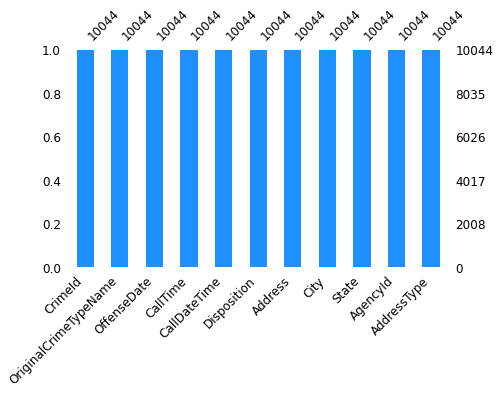

In [79]:
""" crear instancia de propiedades de figura"""
fig = plt.figure(figsize=(15,4))
""" añadir ejes verticales y horizontales """
ax1 = fig.add_subplot(1,2,1)
""" obtener datos faltantes por columna """
msno.bar(df, fontsize=12, color='dodgerblue', ax=ax1)
""" almacenar imagen con formato """
plt.savefig('Muestra_datosTratados.jpg', dpi=300, bbox_inches='tight')
"""mostrar imagen"""
plt.show()

# 4. Convertir a Json

In [38]:
""" crear archivo Json con el conjunto de datos """
df.to_json('dataset_limpieza_datos.json',orient='records',lines=True)

None


In [86]:
""" importar dataset con formato json """
df_js = pd.read_json('dataset_limpieza_datos.json', lines=True)
""" mostrar registros """
df_js[120:130]

,CrimeId,OriginalCrimeTypeName,OffenseDate,CallTime,CallDateTime,Disposition,Address,City,State,AgencyId,AddressType
120,160920051,Noise Nuisance,2016-04-01T00:00:00,0:21,2016-04-01T00:21:00,HAN,California St/taylor St,San Francisco,CA,1,Intersection
121,160920053,Traffic Stop,2016-04-01T00:00:00,0:23,2016-04-01T00:23:00,ADV,Van Ness Av/pine St,San Francisco,CA,1,Intersection
122,160920054,Traffic Stop,2016-04-01T00:00:00,0:25,2016-04-01T00:25:00,ADV,1000 Block Of Mission St,San Francisco,CA,1,Premise Address
123,160920055,Traffic Stop,2016-04-01T00:00:00,0:25,2016-04-01T00:25:00,CIT,20th St/folsom St,San Francisco,CA,1,Intersection
124,160920056,Traffic Stop,2016-04-01T00:00:00,0:26,2016-04-01T00:26:00,CIT,Junipero Serra Bl/holloway Av,San Francisco,CA,1,Intersection
125,160920058,Fight No Weapon,2016-04-01T00:00:00,0:26,2016-04-01T00:26:00,ND,300 Block Of Powell St,San Francisco,CA,1,Premise Address
126,160920060,Traffic Stop,2016-04-01T00:00:00,0:26,2016-04-01T00:26:00,ADV,Rio Verde St/geneva Av,Daly City,CA,1,Intersection
127,160920061,Noise Nuisance,2016-04-01T00:00:00,0:26,2016-04-01T00:26:00,HAN,1100 Block Of Pine St,San Francisco,CA,1,Premise Address
128,160920064,Threats / Harassment,2016-04-01T00:00:00,0:26,2016-04-01T00:26:00,ND,200 Block Of Eddy St,San Francisco,CA,1,Premise Address
129,160920065,Boombox,2016-04-01T00:00:00,0:28,2016-04-01T00:28:00,ADV,Mission St/16th St,San Francisco,CA,1,Intersection
